<a href="https://colab.research.google.com/github/ShakambariSaxena/2-label-Classification/blob/main/Copy_of_classification_done_for_2_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing libraries**

In [ ]:
!pip install nltk
!pip install gensim
!pip install scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import nltk
!python -m nltk.downloader popular
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install imbalanced-learn

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_d

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Uploading Data**

In [ ]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

Saving transcripts.zip to transcripts.zip


In [ ]:
import zipfile

zip_file_path = '/content/transcripts.zip'  # Replace with the actual path to your zip file
folder_to_extract = 'transcript'  # Replace with the name of the folder you want to extract

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_to_extract)

print("Folder extraction complete.")


Folder extraction complete.


In [ ]:
import os
import re

corpus_dir = '/content/transcript/transcripts'

texts = []
labels = []

folder_names = [folder for folder in os.listdir(corpus_dir) if os.path.isdir(os.path.join(corpus_dir, folder))]
folder_names.sort()

for folder_name in folder_names:
    folder_path = os.path.join(corpus_dir, folder_name)

    # Get the list of text files in the folder
    files = [file for file in os.listdir(folder_path) if file.endswith('.txt')]

    if len(files) == 1:
        # Process the single text file in the folder
        file_path = os.path.join(folder_path, files[0])
        with open(file_path, 'r') as f:
            lines = f.readlines()

            for line in lines:
                line = line.strip()
                if line:
                    match = re.search(r"['\"](.*?)\[([\d]+)\]",line)
                    if match:
                        sentence = match.group(1)
                        label = match.group(2)

                        sentence = re.sub(r'^\d+\.\s+', '', sentence)
                        sentence = re.sub(r'[^\w\s]', '', sentence)  # Remove symbols
                        sentence = sentence.lower()

                        texts.append(sentence)
                        labels.append(int(label))

    elif len(files) == 2:
        # Process Channel_1 text file
        file_path = os.path.join(folder_path, 'Channel_1.txt')
        with open(file_path, 'r') as f:
            lines = f.readlines()

            for line in lines:
                line = line.strip()
                if line:
                    match = re.search(r"['\"](.*?)\[([\d]+)\]",line)
                    if match:
                        sentence = match.group(1)
                        label = match.group(2)

                        sentence = re.sub(r'^\d+\.\s+', '', sentence)
                        sentence = re.sub(r'[^\w\s]', '', sentence)  # Remove symbols
                        sentence = sentence.lower()

                        texts.append(sentence)
                        labels.append(int(label))

        # Process Channel_2 text file
        file_path = os.path.join(folder_path, 'Channel_2.txt')
        with open(file_path, 'r') as f:
            lines = f.readlines()

            for line in lines:
                line = line.strip()
                if line:
                    match = re.search(r"['\"](.*?)\[([\d]+)\]",line)
                    if match:
                        sentence = match.group(1)
                        label = match.group(2)

                        sentence = re.sub(r'^\d+\.\s+', '', sentence)
                        sentence = re.sub(r'[^\w\s]', '', sentence)  # Remove symbols
                        sentence = sentence.lower()

                        texts.append(sentence)
                        labels.append(int(label))

# Write the text and label data to a new file in the current directory
output_file = 'dataset.txt'
with open(output_file, 'w') as f:
    for text, label in zip(texts, labels):
        line = f'{label}\t{text}\n'
        f.write(line)


**Preprocessing dataset**

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

def process_text(input_file, output_file):
    english_stopwords = set(stopwords.words('english'))
    german_stopwords = set(stopwords.words('german'))
    stemmer = SnowballStemmer("german")
    lemmatizer = WordNetLemmatizer()

    with open(input_file, 'r') as file:
        lines = file.readlines()

    processed_lines = []
    for line in lines:
        label, text = line.split('\t')

        # Skip the line if the label is 4 or 1
        if label in ['4', '1']:
            continue

        blob = TextBlob(text)

        # Remove stopwords and perform stemming and lemmatization
        words = [lemmatizer.lemmatize(stemmer.stem(word.lower())) for word in blob.words
                 if word.lower() not in english_stopwords and word.lower() not in german_stopwords]

        processed_text = ' '.join(words)

        # Skip processing if line becomes blank
        if not processed_text.strip():
            continue

        processed_lines.append(f"{label}\t{processed_text}\n")

    with open(output_file, 'w') as file:
        file.writelines(processed_lines)

# Specify the paths to your input and output files
input_file = '/content/dataset.txt'
output_file = '/content/preprocessed_dataset.txt'

# Call the function to process the text file
process_text(input_file, output_file)


**Label Distribution**

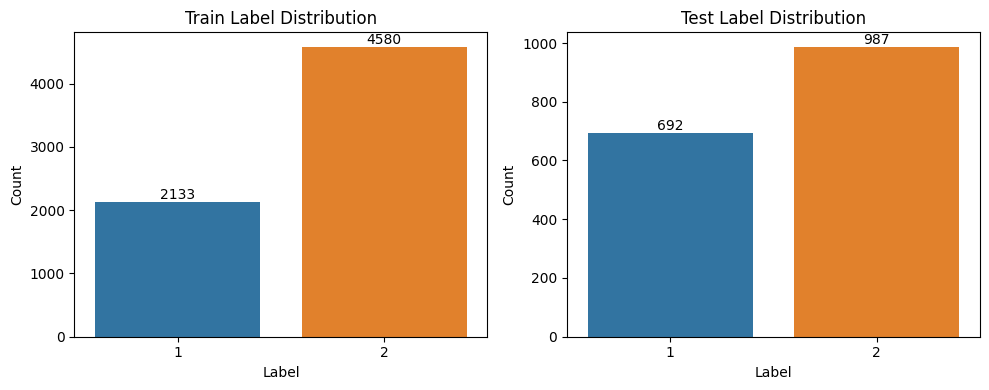

{2: 2133, 3: 4580}
{2: 692, 3: 987}


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the dataset
sentences = []
labels = []
with open('/content/preprocessed_dataset.txt', 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            parts = line.split('\t')
            if len(parts) == 2:
                label, sentence = parts
                sentences.append(sentence)
                labels.append(int(label))

split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(sentences) * split_ratio)
train_sentences = sentences[:split_index]
train_labels = labels[:split_index]
test_sentences = sentences[split_index:]
test_labels = labels[split_index:]

# Step 3: Create train and test folders
train_folder = '/content/train_dataset'
test_folder = '/content/test_dataset'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Save train dataset
with open(os.path.join(train_folder, 'train_dataset.txt'), 'w') as file:
    for sentence, label in zip(train_sentences, train_labels):
        file.write(f'{label}\t{sentence}\n')

# Save test dataset
with open(os.path.join(test_folder, 'test_dataset.txt'), 'w') as file:
    for sentence, label in zip(test_sentences, test_labels):
        file.write(f'{label}\t{sentence}\n')

# Step 4: Calculate label distributions
train_label_counts = {label: train_labels.count(label) for label in set(train_labels)}
test_label_counts = {label: test_labels.count(label) for label in set(test_labels)}

# Step 5: Plot label distributions
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=list(train_label_counts.keys()), y=list(train_label_counts.values()))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Train Label Distribution')
plt.xticks(range(len(train_label_counts)), ['1', '2'])  # Set x-tick labels to '1' and '2'


for index, value in enumerate(train_label_counts.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')


plt.subplot(1, 2, 2)
sns.barplot(x=list(test_label_counts.keys()), y=list(test_label_counts.values()))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Test Label Distribution')
plt.xticks(range(len(test_label_counts)), ['1', '2'])  # Set x-tick labels to '1' and '2'


for index, value in enumerate(test_label_counts.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(train_label_counts)
print(test_label_counts)

**Word2vec**

In [ ]:
from gensim.models import Word2Vec

# Read train dataset from file
with open("/content/preprocessed_dataset.txt", "r") as file:
    train_dataset = file.readlines()

# Extract only the text portion (excluding the labels)
text_lines = [line.strip().split("\t")[1] for line in train_dataset]

# Tokenize the sentences
tokenized_sentences = [sentence.lower().split() for sentence in text_lines]

# Train Word2Vec model on the tokenized sentences
model = Word2Vec(tokenized_sentences, vector_size=1024, window=5, min_count=1, workers=4,sg=1)

# Save the Word2Vec model for future use
model.save("word2vec.model")

# Get the Word2Vec vocabulary size
word_vocab_size = len(model.wv)

print("Word2Vec Model Vocabulary Size:", word_vocab_size)


Word2Vec Model Vocabulary Size: 4339


**Importing libraries**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

**Logistric Regression Method**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Load the pre-trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec.model")

# Create word embeddings for training data
train_word_embeddings = []
for _, text in train_data:
    words = text.split()
    embeddings = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if embeddings:
        average_embedding = np.mean(embeddings, axis=0)
        train_word_embeddings.append(average_embedding)
train_word_embeddings = np.array(train_word_embeddings)

# Create word embeddings for test data
test_word_embeddings = []
for _, text in test_data:
    words = text.split()
    embeddings = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if embeddings:
        average_embedding = np.mean(embeddings, axis=0)
        test_word_embeddings.append(average_embedding)
test_word_embeddings = np.array(test_word_embeddings)

# Create the logistic regression model
logistic_model = LogisticRegression()

# Train the model using word embeddings
logistic_model.fit(train_word_embeddings, train_labels.argmax(axis=1))

# Predict the test labels
logistic_predictions = logistic_model.predict(test_word_embeddings)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(test_labels.argmax(axis=1), logistic_predictions))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.08      0.15       692
           1       0.60      0.97      0.74       987

    accuracy                           0.61      1679
   macro avg       0.63      0.53      0.45      1679
weighted avg       0.63      0.61      0.50      1679



**SVM method**

In [ ]:
from sklearn.svm import SVC

# Load the pre-trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec.model")

# Create word embeddings for training data
train_word_embeddings = []
for _, text in train_data:
    words = text.split()
    embeddings = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if embeddings:
        average_embedding = np.mean(embeddings, axis=0)
        train_word_embeddings.append(average_embedding)
train_word_embeddings = np.array(train_word_embeddings)

# Create word embeddings for test data
test_word_embeddings = []
for _, text in test_data:
    words = text.split()
    embeddings = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if embeddings:
        average_embedding = np.mean(embeddings, axis=0)
        test_word_embeddings.append(average_embedding)
test_word_embeddings = np.array(test_word_embeddings)

# Create the SVM model
svm_model = SVC()

# Train the model using word embeddings
svm_model.fit(train_word_embeddings, train_labels.argmax(axis=1))

# Predict the test labels
svm_predictions = svm_model.predict(test_word_embeddings)

# Print classification report
print("SVM Classification Report:")
print(classification_report(test_labels.argmax(axis=1), svm_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.04      0.07       692
           1       0.59      0.98      0.74       987

    accuracy                           0.59      1679
   macro avg       0.62      0.51      0.41      1679
weighted avg       0.61      0.59      0.47      1679



**LSTM using Categorical Crossentropy loss function**


In [ ]:
# Load the pre-trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec.model")

# Read training data from file
train_data = []
with open("/content/train_dataset/train_dataset.txt", "r") as file:
    for line in file:
        line = line.strip().split("\t")
        label = int(line[0])
        text = line[1]
        train_data.append((label, text))

# Create tokenizer and fit on training texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text for _, text in train_data)

# Convert training texts to sequences
train_sequences = []
train_labels = []
for label, text in train_data:
    if label in [2, 3]:  # Keep only labels 2 and 3
        sequence = tokenizer.texts_to_sequences([text])[0]
        train_sequences.append(sequence)
        train_labels.append(label)

# Pad training sequences to have equal length
max_length = max(len(seq) for seq in train_sequences)
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length)

# Convert training labels to categorical
train_labels = to_categorical(np.array(train_labels) - 2)  # Adjust labels to start from 0


# Create the LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = word2vec_model.vector_size
hidden_units = 64
sentence_embedding_dim = 256
num_classes = 2  # Number of classes for text classification

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))  # Set trainable=True
model.add(LSTM(units=hidden_units))
model.add(Dense(units=sentence_embedding_dim))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(padded_train_sequences, train_labels, epochs=20, shuffle=False)

# Read test data from file
test_data = []
with open("/content/test_dataset/test_dataset.txt", "r") as file:
    for line in file:
        line = line.strip().split("\t")
        label = int(line[0])
        text = line[1]
        test_data.append((label, text))

# Convert test texts to sequences
test_sequences = []
test_labels = []
for label, text in test_data:
    if label in [2, 3]:  # Keep only labels 2 and 3
        sequence = tokenizer.texts_to_sequences([text])[0]
        test_sequences.append(sequence)
        test_labels.append(label)

# Pad test sequences to have equal length
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length)

# Convert test labels to categorical
test_labels = to_categorical(np.array(test_labels) - 2)  # Adjust labels to start from 0

# Predict the test labels
predictions = model.predict(padded_test_sequences)
predicted_labels = np.argmax(predictions, axis=1) + 2  # Adjust labels to start from 2

# Print classification report
print(classification_report(test_labels.argmax(axis=1) + 2, predicted_labels))

Epoch 1/20
210/210 [==============================] - 74s 338ms/step - loss: 0.6099 - accuracy: 0.6769
Epoch 2/20
210/210 [==============================] - 72s 345ms/step - loss: 0.4679 - accuracy: 0.7727
Epoch 3/20
210/210 [==============================] - 70s 335ms/step - loss: 0.3474 - accuracy: 0.8348
Epoch 4/20
210/210 [==============================] - 71s 338ms/step - loss: 0.2839 - accuracy: 0.8582
Epoch 5/20
210/210 [==============================] - 78s 374ms/step - loss: 0.2550 - accuracy: 0.8680
Epoch 6/20
210/210 [==============================] - 71s 339ms/step - loss: 0.2384 - accuracy: 0.8740
Epoch 7/20
210/210 [==============================] - 73s 347ms/step - loss: 0.2264 - accuracy: 0.8789
Epoch 8/20
210/210 [==============================] - 70s 335ms/step - loss: 0.2173 - accuracy: 0.8843
Epoch 9/20
210/210 [==============================] - 71s 340ms/step - loss: 0.2095 - accuracy: 0.8926
Epoch 10/20
210/210 [==============================] - 71s 338ms/step - l

**LSTM Using cateogrical_entropy along with regularization**

In [ ]:
# Load the pre-trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec.model")

# Read training data from file
train_data = []
with open("/content/train_dataset/train_dataset.txt", "r") as file:
    for line in file:
        line = line.strip().split("\t")
        label = int(line[0])
        text = line[1]
        train_data.append((label, text))

# Create tokenizer and fit on training texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text for _, text in train_data)

# Convert training texts to sequences
train_sequences = []
train_labels = []
for label, text in train_data:
    if label in [2, 3]:  # Keep only labels 2 and 3
        sequence = tokenizer.texts_to_sequences([text])[0]
        train_sequences.append(sequence)
        train_labels.append(label)

# Pad training sequences to have equal length
max_length = max(len(seq) for seq in train_sequences)
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length)

# Convert training labels to categorical
train_labels = to_categorical(np.array(train_labels) - 2)  # Adjust labels to start from 0

# Create the LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = word2vec_model.vector_size
hidden_units = 64
sentence_embedding_dim = 256
num_classes = 2  # Number of classes for text classification

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Create the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))
model.add(LSTM(units=hidden_units, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))  # Add kernel_regularizer, recurrent_regularizer, and bias_regularizer
model.add(Dense(units=sentence_embedding_dim, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))  # Add kernel_regularizer and bias_regularizer
model.add(Dense(units=num_classes, activation='softmax'))

# Add dropout layers
model.add(Dropout(0.2))  # Add dropout after LSTM layer
model.add(Dropout(0.2))  # Add dropout after dense layer

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(padded_train_sequences, train_labels, epochs=20, shuffle=False)

# Read test data from file
test_data = []
with open("/content/test_dataset/test_dataset.txt", "r") as file:
    for line in file:
        line = line.strip().split("\t")
        label = int(line[0])
        text = line[1]
        test_data.append((label, text))

# Convert test texts to sequences
test_sequences = []
test_labels = []
for label, text in test_data:
    if label in [2, 3]:  # Keep only labels 2 and 3
        sequence = tokenizer.texts_to_sequences([text])[0]
        test_sequences.append(sequence)
        test_labels.append(label)

# Pad test sequences to have equal length
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length)

# Convert test labels to categorical
test_labels = to_categorical(np.array(test_labels) - 2)  # Adjust labels to start from 0

# Predict the test labels
predictions = model.predict(padded_test_sequences)
predicted_labels = np.argmax(predictions, axis=1) + 2  # Adjust labels to start from 2

# Print classification report
print(classification_report(test_labels.argmax(axis=1) + 2, predicted_labels))


Epoch 1/20
210/210 [==============================] - 73s 327ms/step - loss: nan - accuracy: 0.5509
Epoch 2/20
210/210 [==============================] - 69s 326ms/step - loss: nan - accuracy: 0.5528
Epoch 3/20
210/210 [==============================] - 68s 323ms/step - loss: nan - accuracy: 0.5699
Epoch 4/20
210/210 [==============================] - 69s 328ms/step - loss: nan - accuracy: 0.5827
Epoch 5/20
210/210 [==============================] - 66s 315ms/step - loss: nan - accuracy: 0.5963
Epoch 6/20
210/210 [==============================] - 64s 307ms/step - loss: nan - accuracy: 0.6079
Epoch 7/20
210/210 [==============================] - 66s 317ms/step - loss: nan - accuracy: 0.6018
Epoch 8/20
210/210 [==============================] - 67s 321ms/step - loss: nan - accuracy: 0.6036
Epoch 9/20
210/210 [==============================] - 68s 321ms/step - loss: nan - accuracy: 0.6222
Epoch 10/20
210/210 [==============================] - 67s 319ms/step - loss: nan - accuracy: 0.6125

**Confusion Matrix**

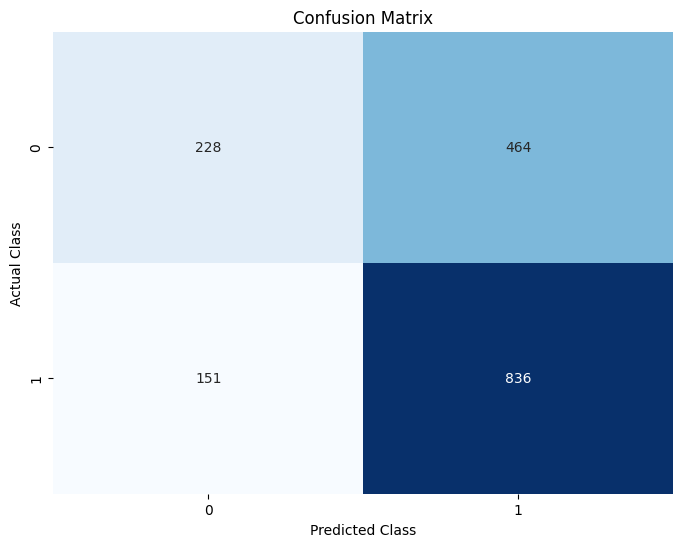

In [ ]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


**LSTM using Binary entropy Cross function**

Epoch 1/20
168/168 [==============================] - 152s 878ms/step - loss: 1.0159 - accuracy: 0.6829 - val_loss: 0.7113 - val_accuracy: 0.6841
Epoch 2/20
168/168 [==============================] - 144s 857ms/step - loss: 0.5674 - accuracy: 0.7377 - val_loss: 0.5737 - val_accuracy: 0.7079
Epoch 3/20
168/168 [==============================] - 142s 847ms/step - loss: 0.4111 - accuracy: 0.8187 - val_loss: 0.6027 - val_accuracy: 0.7288
Epoch 4/20
168/168 [==============================] - 145s 863ms/step - loss: 0.3185 - accuracy: 0.8566 - val_loss: 0.6445 - val_accuracy: 0.7295
Epoch 5/20
168/168 [==============================] - 144s 856ms/step - loss: 0.2733 - accuracy: 0.8756 - val_loss: 0.6879 - val_accuracy: 0.7288
Epoch 6/20
168/168 [==============================] - 142s 845ms/step - loss: 0.2530 - accuracy: 0.8808 - val_loss: 0.7318 - val_accuracy: 0.7295
Epoch 7/20
168/168 [==============================] - 144s 856ms/step - loss: 0.2395 - accuracy: 0.8820 - val_loss: 0.7865 -

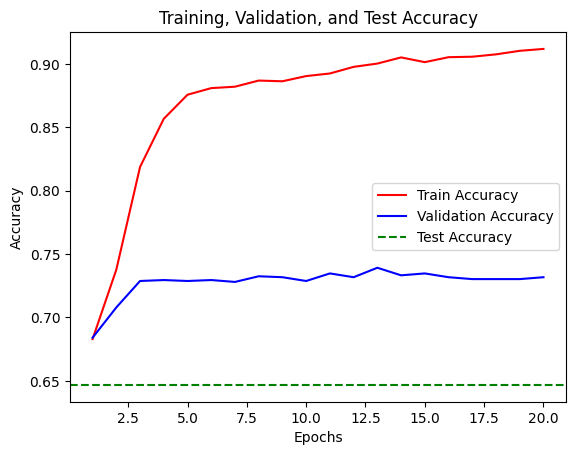

In [ ]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Load the pre-trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec.model")

# Read training data from file
train_data = []
with open("/content/train_dataset/train_dataset.txt", "r") as file:
    for line in file:
        line = line.strip().split("\t")
        label = int(line[0])
        text = line[1]
        train_data.append((label, text))

# Create tokenizer and fit on training texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text for _, text in train_data)

# Convert training texts to sequences
train_sequences = []
train_labels = []
for label, text in train_data:
    if label in [2, 3]:  # Keep only labels 2 and 3
        sequence = tokenizer.texts_to_sequences([text])[0]
        train_sequences.append(sequence)
        train_labels.append(label)

# Pad training sequences to have equal length
max_length = max(len(seq) for seq in train_sequences)
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length)

# Convert training labels to binary format
train_labels = np.array(train_labels)
train_labels = np.where(train_labels == 2, 0, 1)  # Convert label 2 to 0 and label 3 to 1

# Apply SMOTE for oversampling the minority class (label 2)
smote = SMOTE(sampling_strategy={0: len(train_labels[train_labels == 1])}, random_state=42)
padded_train_sequences_smote, train_labels_smote = smote.fit_resample(padded_train_sequences, train_labels)

# Create the LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = word2vec_model.vector_size
hidden_units = 64
sentence_embedding_dim = 256

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Create the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))
model.add(LSTM(units=hidden_units,dropout=0.2,recurrent_dropout=0.2))  # Add regularization
model.add(Dense(units=sentence_embedding_dim, kernel_regularizer='l2', bias_regularizer='l2'))  # Add regularization
model.add(Dropout(0.2))  # Add dropout after LSTM layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split data into training and validation sets
validation_split = 0.2
num_samples = len(padded_train_sequences)
num_validation_samples = int(validation_split * num_samples)

x_train = padded_train_sequences[:-num_validation_samples]
y_train = train_labels[:-num_validation_samples]
x_val = padded_train_sequences[-num_validation_samples:]
y_val = train_labels[-num_validation_samples:]

# Train the model and record history
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, shuffle=False)

# Read test data from file
test_data = []
with open("/content/test_dataset/test_dataset.txt", "r") as file:
    for line in file:
        line = line.strip().split("\t")
        label = int(line[0])
        text = line[1]
        test_data.append((label, text))

# Convert test texts to sequences
test_sequences = []
test_labels = []
for label, text in test_data:
    if label in [2, 3]:  # Keep only labels 2 and 3
        sequence = tokenizer.texts_to_sequences([text])[0]
        test_sequences.append(sequence)
        test_labels.append(label)

# Pad test sequences to have equal length
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length)

# Convert test labels to binary format
test_labels = np.array(test_labels)
test_labels = np.where(test_labels == 2, 0, 1)  # Convert label 2 to 0 and label 3 to 1

# Predict the test labels
predictions = model.predict(padded_test_sequences)
predicted_labels = np.where(predictions >= 0.5, 1, 0)  # Convert probabilities to binary predictions

# Calculate test accuracy
test_accuracy = accuracy_score(test_labels, predicted_labels)
print("Test Accuracy:", test_accuracy)

# Print classification report
print(classification_report(test_labels, predicted_labels))

# Plotting train and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)


plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.axhline(test_accuracy, color='g', linestyle='--', label='Test Accuracy')  # Add line for test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

